# K Means Clustering Project #2

We will use KMeans Clustering to cluster Universities into to two groups, Private and Public.

**Note**: This particular dataset does contains label, but we won't use them on the algorithm.

## Data and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

We will use a data frame with 777 observations on the following 18 variables.

The `college-data.csv` dataset contains the following columns:

- `Private`: A factor with levels No and Yes indicating private or public university
- `Apps`: Number of applications received
- `Accept`: Number of applications accepted
- `Enroll`: Number of new students enrolled
- `Top10perc Pct.`: new students from top 10% of H.S. class
- `Top25perc Pct.`: new students from top 25% of H.S. class
- `F.Undergrad`: Number of fulltime undergraduates
- `P.Undergrad`: Number of parttime undergraduates
- `Outstate`: Out-of-state tuition
- `Room.Board`: Room and board costs
- `Books`: Estimated book costs
- `Personal`: Estimated personal spending
- `PhD`: Pct. of faculty with Ph.D.’s
- `Terminal`: Pct. of faculty with terminal degree
- `S.F.Ratio`: Student/faculty ratio
- `perc.alumni`: Pct. alumni who donate
- `Expend`: Instructional expenditure per student
- `Grad.Rate`: Graduation rate

In [2]:
df = pd.read_csv('../data/college-data.csv',index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

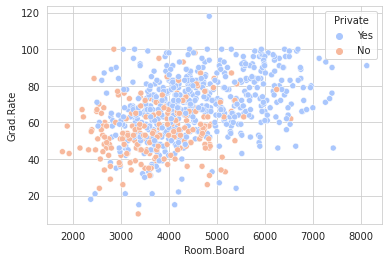

In [6]:
sns.set_style('whitegrid')
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private',palette='coolwarm')

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

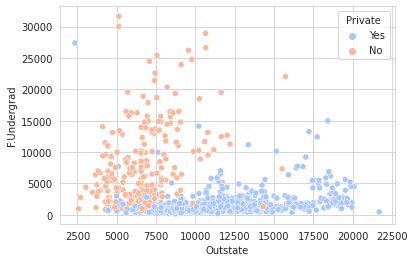

In [7]:
sns.scatterplot(data=df,x='Outstate',y='F.Undergrad',hue='Private',palette='coolwarm')

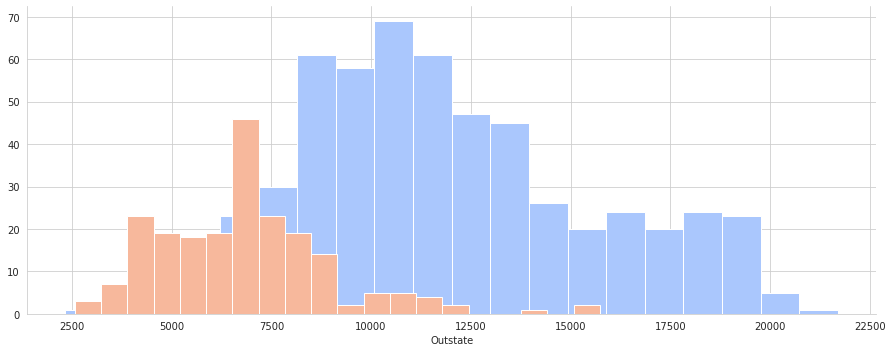

In [8]:
g = sns.FacetGrid(data=df,hue='Private',height=5,aspect=2.5,palette='coolwarm')
g.map(plt.hist, 'Outstate', bins=20)

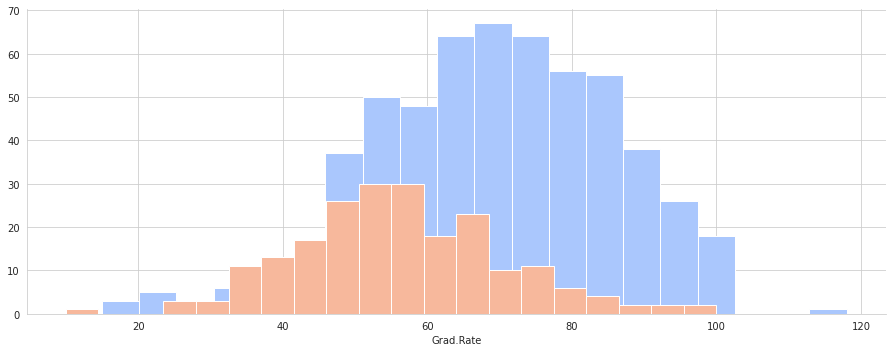

In [9]:
g = sns.FacetGrid(data=df,hue='Private',height=5,aspect=2.5,palette='coolwarm').map(plt.hist,'Grad.Rate', bins=20)

In [10]:
# There is a private school with a gaduation rate higher than 100%

df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [11]:
# Fixing the >100% graduation rate

df.loc[df['Grad.Rate'] > 100] = 100

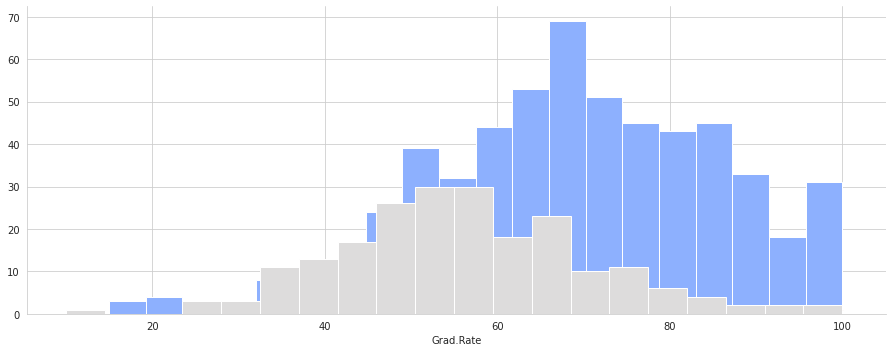

In [12]:
g = sns.FacetGrid(data=df,hue='Private',height=5,aspect=2.5,palette='coolwarm')
g.map(plt.hist,'Grad.Rate', bins=20)

## Model

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2,n_init=50,max_iter=700)

In [15]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(max_iter=700, n_clusters=2, n_init=50)

In [16]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.80763378e+03, 1.28218386e+03, 4.90406577e+02, 2.54454410e+01,
        5.35680120e+01, 2.18718834e+03, 5.95590433e+02, 1.03818311e+04,
        4.30427952e+03, 5.41234679e+02, 1.27973842e+03, 7.05590433e+01,
        7.79043348e+01, 1.42278027e+01, 2.32944694e+01, 8.92069058e+03,
        6.50926756e+01]])

## Evaluating the model

Since we have the labels in this dataset, we'll use them for evaluating. In general, that's not the case

In [17]:
def pub_priv(Private):
    if Private == 'Yes':
        return 1
    else:
        return 0
    
df['Cluster'] = df['Private'].apply(lambda private: pub_priv(private))
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(df['Cluster'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       213
           1       0.79      0.94      0.86       564

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [20]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))

[[ 74 139]
 [ 34 530]]


In [21]:
# The model didn't perform too well
# Some extra plotting for a visual comparison

df['Predicted Labels'] = kmeans.labels_

<AxesSubplot:xlabel='Grad.Rate', ylabel='Expend'>

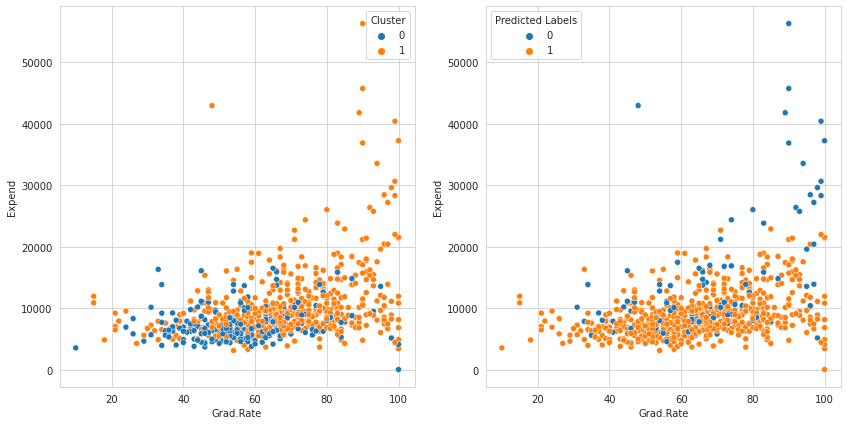

In [22]:
f, axes = plt.subplots(1, 2,figsize=(14,7))
sns.scatterplot(data=df,x='Grad.Rate',y='Expend',hue='Cluster',ax=axes[0])
sns.scatterplot(data=df,x='Grad.Rate',y='Expend',hue='Predicted Labels',ax=axes[1])